In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
stu_por = pd.read_csv('student-por.csv')

In [32]:
stu_por.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [33]:
stu=stu_por
stu["total_grades"]=(stu["G1"]+stu["G2"]+stu["G3"])/3

In [34]:
stu=stu.drop(["G1","G2","G3"],axis=1)
max=stu["total_grades"].max()
min=stu["total_grades"].min()

In [35]:
def marks(total_grades):
    if(total_grades<7):
        return("low")
    elif(total_grades>=7 and total_grades<14):
        return("average")
    elif(total_grades>=14):
        return("high")
stu["grades"]=stu["total_grades"].apply(marks)

In [36]:
stu.dtypes
stu.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,total_grades
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.625064
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.833360
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.333333
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.666667
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,18.666667


In [37]:
#describing categorical data
stu.describe(include="all")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,total_grades,grades
count,649,649,649.000000,649,649,649,649.000000,649.000000,649,649,...,649,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,average
freq,423,383,NaN,452,457,569,NaN,NaN,258,367,...,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490
mean,NaN,NaN,16.744222,NaN,NaN,NaN,2.514638,2.306626,NaN,NaN,...,NaN,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.625064,NaN
std,NaN,NaN,1.218138,NaN,NaN,NaN,1.134552,1.099931,NaN,NaN,...,NaN,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.833360,NaN
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.333333,NaN
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,...,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,NaN
50%,NaN,NaN,17.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.666667,NaN
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.333333,NaN


In [38]:
stu.info()

#checking for null values
stu.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        649 non-null    object 
 1   sex           649 non-null    object 
 2   age           649 non-null    int64  
 3   address       649 non-null    object 
 4   famsize       649 non-null    object 
 5   Pstatus       649 non-null    object 
 6   Medu          649 non-null    int64  
 7   Fedu          649 non-null    int64  
 8   Mjob          649 non-null    object 
 9   Fjob          649 non-null    object 
 10  reason        649 non-null    object 
 11  guardian      649 non-null    object 
 12  traveltime    649 non-null    int64  
 13  studytime     649 non-null    int64  
 14  failures      649 non-null    int64  
 15  schoolsup     649 non-null    object 
 16  famsup        649 non-null    object 
 17  paid          649 non-null    object 
 18  activities    649 non-null    

school          False
sex             False
age             False
address         False
famsize         False
Pstatus         False
Medu            False
Fedu            False
Mjob            False
Fjob            False
reason          False
guardian        False
traveltime      False
studytime       False
failures        False
schoolsup       False
famsup          False
paid            False
activities      False
nursery         False
higher          False
internet        False
romantic        False
famrel          False
freetime        False
goout           False
Dalc            False
Walc            False
health          False
absences        False
total_grades    False
grades          False
dtype: bool

/home/habib/notebook_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Student')

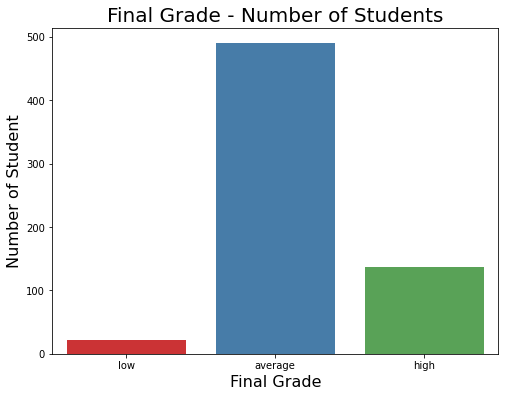

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(stu["grades"], order=["low","average","high"], palette='Set1')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

Text(0.5, 1.0, 'Correlation Heatmap')

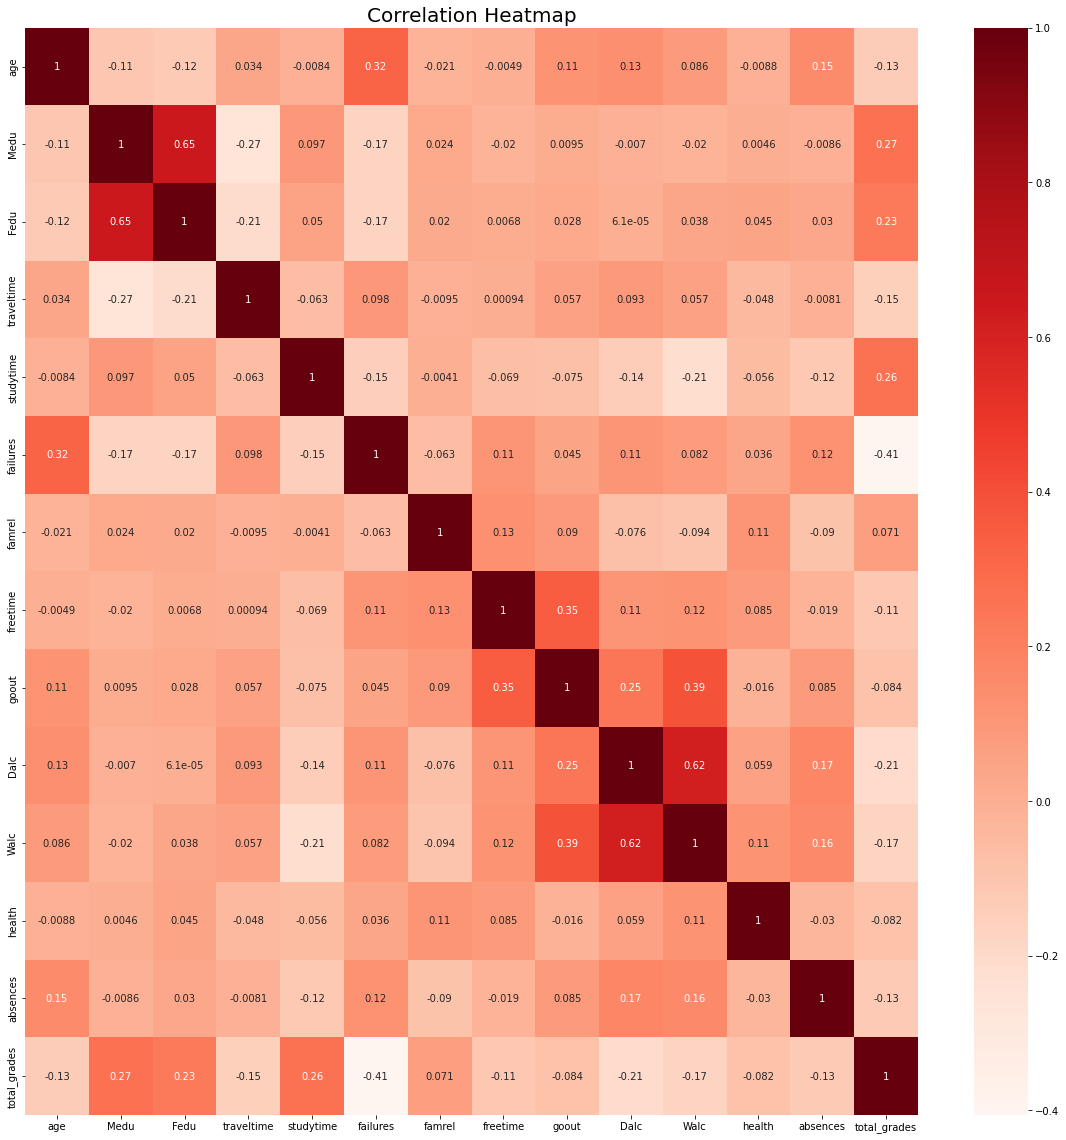

In [40]:
corr=stu.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

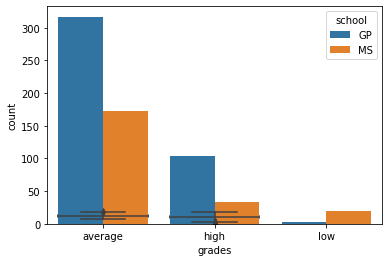

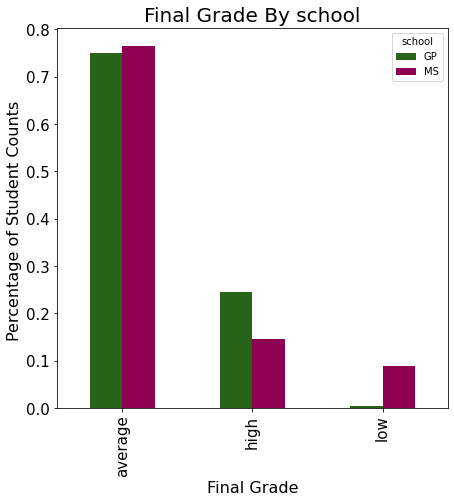

In [41]:
#comparing school with grades
sns.boxplot(x="school", y="total_grades", data=stu)

school_counts=stu["school"].value_counts().to_frame()
school_counts.rename(columns={"school":"school_counts"},inplace=True)
school_counts.index.name='school'

school_sns=sns.countplot(hue=stu["school"],x=stu["grades"],data=stu)

#crosstab is expanded form of value counts the the factors inside any variables
perc=(lambda col:col/col.sum())
index=["average","high","low"]
schooltab1=pd.crosstab(columns=stu.school,index=stu.grades)

school_perc=schooltab1.apply(perc).reindex(index)

school_perc.plot.bar(colormap="PiYG_r",fontsize=15,figsize=(7,7))
plt.title('Final Grade By school', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()


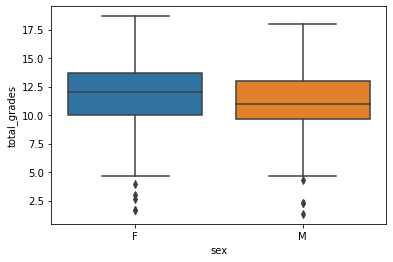

In [42]:
#comparing sex with grades
sns.boxplot(x="sex", y="total_grades", data=stu)
school_counts=stu["sex"].value_counts()
#as the graph of sex nearly overlaps so it will not have impact on grades
stu=stu.drop(["sex"],axis=1)

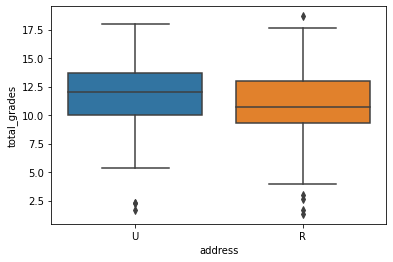

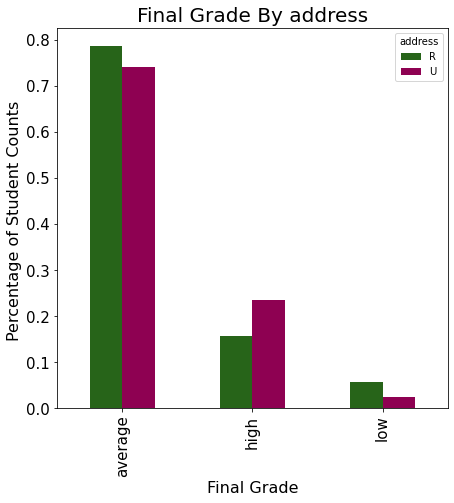

In [43]:
#comparing address with grades
sns.boxplot(x="address", y="total_grades", data=stu)
index=["average","high","low"]
addresstab1=pd.crosstab(columns=stu.address,index=stu.grades)

address_perc=addresstab1.apply(perc).reindex(index)

address_perc.plot.bar(colormap="PiYG_r",fontsize=15,figsize=(7,7))
plt.title('Final Grade By address', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()
#address is factor for the grades

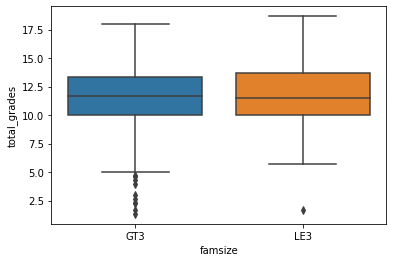

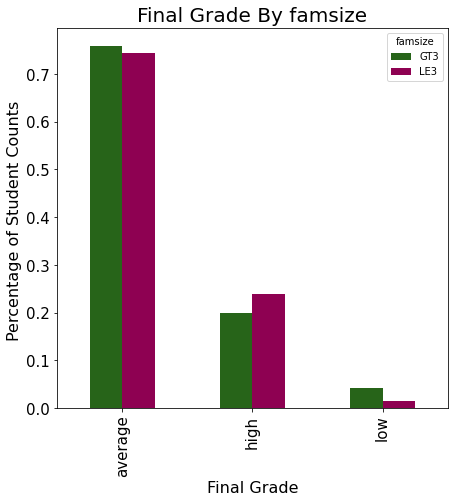

In [44]:
#comparing famsize with grades
sns.boxplot(x="famsize", y="total_grades", data=stu)
famsizetab1=pd.crosstab(columns=stu.famsize,index=stu.grades)

famsize_perc=famsizetab1.apply(perc).reindex(index)

famsize_perc.plot.bar(colormap="PiYG_r",fontsize=15,figsize=(7,7))
plt.title('Final Grade By famsize', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()
#famsize has great impact on grades

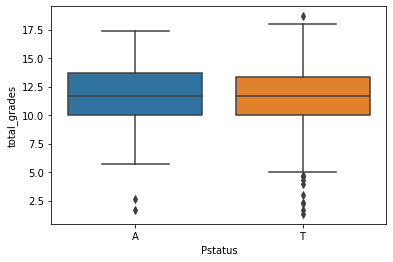

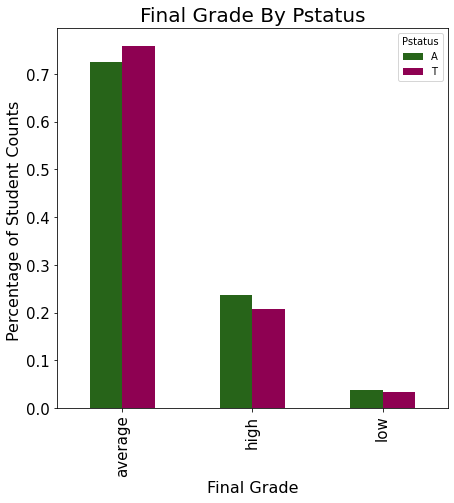

In [45]:
#comparing pstatus with grades
sns.boxplot(x="Pstatus", y="total_grades", data=stu)
Pstatustab1=pd.crosstab(columns=stu.Pstatus,index=stu.grades)

Pstatus_perc=Pstatustab1.apply(perc).reindex(index)

Pstatus_perc.plot.bar(colormap="PiYG_r",fontsize=15,figsize=(7,7))
plt.title('Final Grade By Pstatus', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

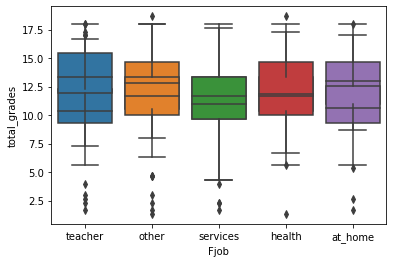

In [46]:
#comparing jobs
sns.boxplot(x="Mjob", y="total_grades", data=stu)
sns.boxplot(x="Fjob", y="total_grades", data=stu)
stu1=stu[["Fjob","Mjob","total_grades"]]
job_grp=stu1.groupby(['Mjob','Fjob'],as_index=False).mean()
job_pivot=job_grp.pivot(index='Mjob',columns='Fjob',values='total_grades')

<AxesSubplot:xlabel='reason', ylabel='total_grades'>

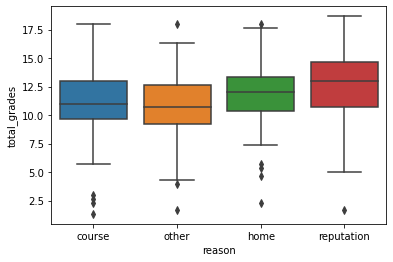

In [47]:
sns.boxplot(x="reason", y="total_grades", data=stu)

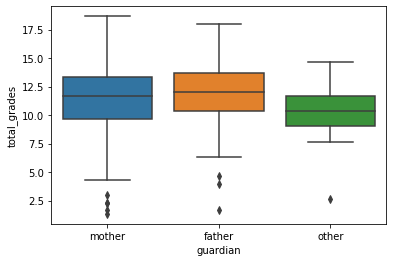

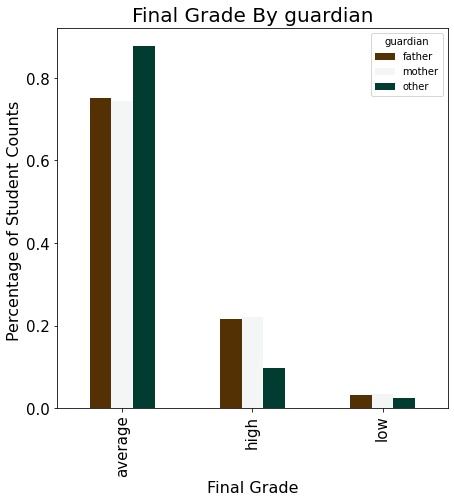

In [48]:
sns.boxplot(x="guardian", y="total_grades", data=stu)

guardiantab1=pd.crosstab(columns=stu.guardian,index=stu.grades)
guardian_perc=guardiantab1.apply(perc).reindex(index)
guardian_perc.plot.bar(colormap="BrBG",fontsize=15,figsize=(7,7))
plt.title('Final Grade By guardian', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

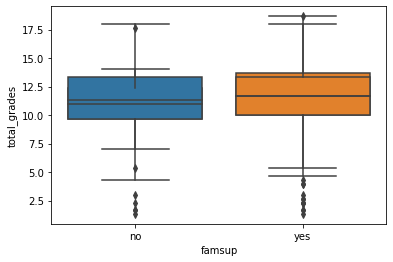

In [49]:
#support of family and school
sns.boxplot(x="schoolsup", y="total_grades", data=stu)
#it is the important factor
sns.boxplot(x="famsup", y="total_grades", data=stu)
stu[["famsup","total_grades"]].groupby(["famsup"],as_index=False).mean()
#famsup does not have great impact on grades 
stu=stu.drop(["famsup"],axis=1) 

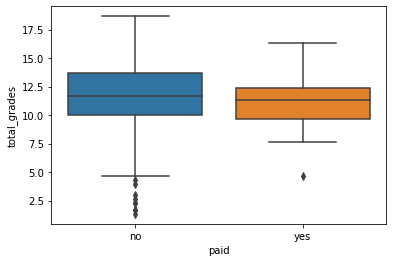

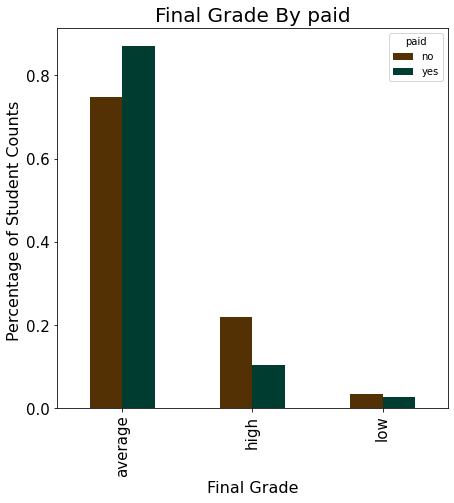

In [50]:
#comparing paid attributes
sns.boxplot(x="paid", y="total_grades", data=stu)
paidtab1=pd.crosstab(columns=stu.paid,index=stu.grades)
paid_perc=paidtab1.apply(perc).reindex(index)
paid_perc.plot.bar(colormap="BrBG",fontsize=15,figsize=(7,7))
plt.title('Final Grade By paid', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()
#paid does not have much influence on grades so
stu=stu.drop(["paid"],axis=1)

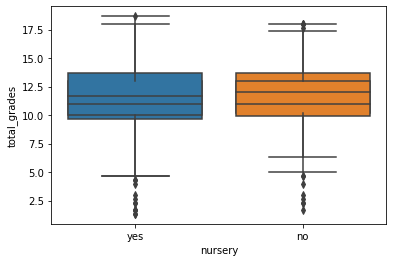

In [51]:
sns.boxplot(x="activities", y="total_grades", data=stu)
#is has graet impact on student perforamnce
sns.boxplot(x="nursery", y="total_grades", data=stu)
#it does not have great impact on performance
stu=stu.drop(["nursery"],axis=1)

<AxesSubplot:xlabel='internet', ylabel='total_grades'>

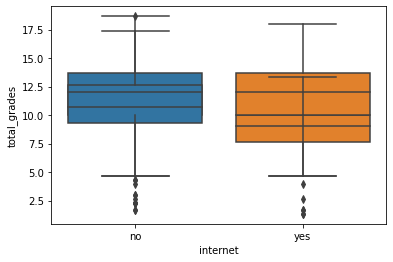

In [52]:
#comparing if higher educatiob of students have impact on performance
sns.boxplot(x="higher", y="total_grades", data=stu)

sns.boxplot(x="internet", y="total_grades", data=stu)
#internet also have great impact on performance of individual

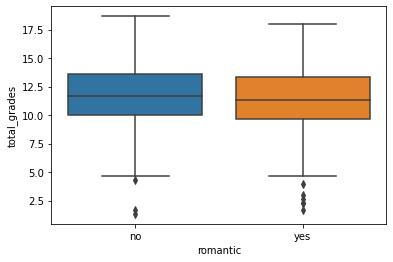

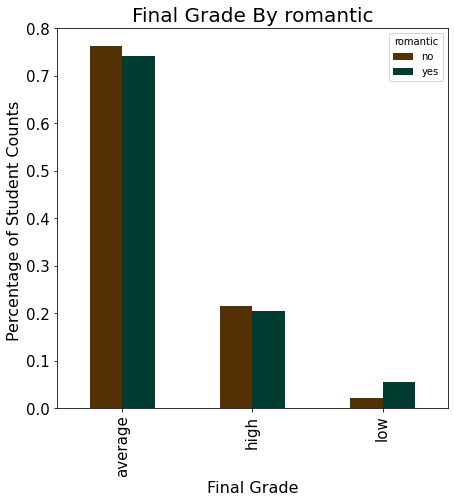

In [53]:
#high school romace impact on the performance of students
sns.boxplot(x="romantic", y="total_grades", data=stu)
romantictab1=pd.crosstab(columns=stu.romantic,index=stu.grades)
romantic_perc=romantictab1.apply(perc).reindex(index)
romantic_perc.plot.bar(colormap="BrBG",fontsize=15,figsize=(7,7))
plt.title('Final Grade By romantic', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()
#so high school romance leads to decline in performance of students
#beware of that

In [54]:
stu.columns

Index(['school', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'activities', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'total_grades', 'grades'],
      dtype='object')

In [55]:
stu1=pd.get_dummies(stu,columns=["school","address","famsize","Pstatus","Mjob","Fjob","reason","guardian", 'schoolsup', 'activities', 'higher', 'internet', 'romantic' ])
test_stu1=stu1["grades"]
teststu1=stu1["total_grades"]
train_stu1=stu1.drop(['total_grades','grades'],axis=1)
train_stu=train_stu1.values

In [56]:
train_stu1

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,schoolsup_no,schoolsup_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,0,1,1,0,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,0,1,1,0,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,1,0,0,1,0,1,0,1,1,0
645,18,3,1,1,2,0,4,3,4,1,...,1,0,1,0,0,1,0,1,1,0
646,18,1,1,2,2,0,1,1,1,1,...,1,0,0,1,0,1,1,0,1,0
647,17,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0


In [57]:
teststu1

0       7.333333
1      10.333333
2      12.333333
3      14.000000
4      12.333333
         ...    
644    10.333333
645    15.333333
646    10.666667
647    10.000000
648    10.666667
Name: total_grades, Length: 649, dtype: float64

<AxesSubplot:xlabel='age', ylabel='total_grades'>

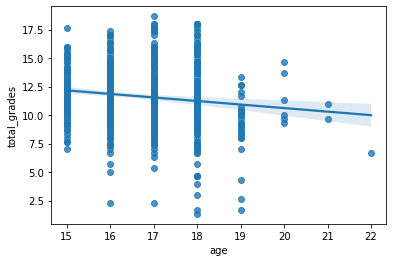

In [58]:
from scipy import stats
#comparing age with marks
sns.regplot(x="age",y="total_grades",data=stu)

In [59]:
#pearson coeffiecient
stu[["age","total_grades"]].corr()
#p-value
pearson_coef , p_value=stats.pearsonr(stu["age"],stu["total_grades"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
#age is not a good factor

The Pearson Correlation Coefficient is -0.13349865498491356  with a P-value of P = 0.0006504408411431509


In [33]:
#using backward elimination for finding optimal featrures

#if p-value is greater than 0.6 than we will removethat feature
import statsmodels.api as sm
X=np.append(arr=np.ones((1044,1)).astype(int),values=train_stu,axis=1)
X_opt = X[:, [0, 1, 2, 3, 4,5,6,7,8,9,10,11,12,13]]
regressor_ols=sm.OLS(endog=teststu1,exog=X_opt).fit()
regressor_ols.summary()

X_opt = X[:, [0,2,3,4,5,6,7,8,9,10,11,12,13]]
regressor_ols=sm.OLS(endog=teststu1,exog=X_opt).fit()
regressor_ols.summary()

X_opt = X[:, [0,2,3,4,5,6,7,9,10,11,12,13]]
regressor_ols=sm.OLS(endog=teststu1,exog=X_opt).fit()
regressor_ols.summary()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1044 and the array at index 1 has size 649

In [34]:
train_x=np.concatenate((X_opt,X[:,14:49]),axis=1)
stu[["Medu","total_grades"]].corr()
stu[["Fedu","total_grades"]].corr()

NameError: name 'X_opt' is not defined